In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("/content/Social_Network_Ads.csv")
data.drop(columns=["User ID","Gender"],inplace=True)
data.head(4)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0


In [6]:
x=data.iloc[:,:-1]
y=data["Purchased"]

In [46]:
counts=data["Purchased"].value_counts().reset_index()
counts

,Purchased,count
0,0,257
1,1,143


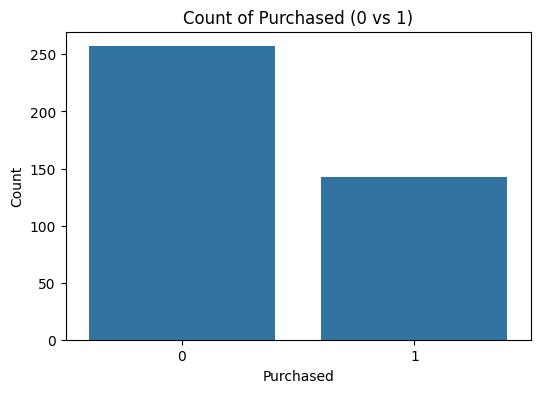

In [45]:
plt.figure(figsize=(6,4))
counts.columns = ['Purchased', 'Count']
sns.barplot(x='Purchased', y='Count', data=counts)
plt.title('Count of Purchased (0 vs 1)')
plt.xlabel('Purchased')
plt.ylabel('Count')
plt.show()

In [48]:
from imblearn.under_sampling import RandomUnderSampler
ru=RandomUnderSampler()
ru_x,ru_y=ru.fit_resample(x,y)
counts1=ru_y.value_counts().reset_index()
counts1

,Purchased,count
0,0,143
1,1,143


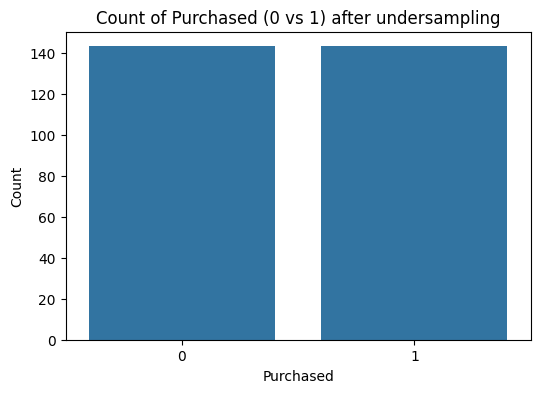

In [49]:
counts1.columns = ['Purchased', 'Count']
plt.figure(figsize=(6,4))
sns.barplot(x='Purchased', y='Count', data=counts1)
plt.title('Count of Purchased (0 vs 1) after undersampling')
plt.xlabel('Purchased')
plt.ylabel('Count')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(ru_x,ru_y,test_size=0.2,random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
print(lr.predict([[48,29000]]))
print(lr.score(x_test,y_test)*100)

[1]
79.3103448275862


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
